<a href="https://colab.research.google.com/github/Prathyush-Kumar/Machine-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install tensorflow

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 75ms/step - accuracy: 0.3152 - loss: 1.8578 - val_accuracy: 0.5297 - val_loss: 1.3414
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.5022 - loss: 1.3795 - val_accuracy: 0.5893 - val_loss: 1.1689
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 72ms/step - accuracy: 0.5653 - loss: 1.2363 - val_accuracy: 0.6336 - val_loss: 1.0547
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - accuracy: 0.5983 - loss: 1.1394 - val_accuracy: 0.6472 - val_loss: 1.0160
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.6265 - loss: 1.0650 - val_accuracy: 0.6658 - val_loss: 0.9598
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6447 - loss: 1.0121 - val_accuracy: 0.6724 - val_loss: 0.9433
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.6601 - loss: 0.9673 - val_accuracy: 0.6744 - val_loss: 0.9397
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.6724 - loss: 0.9350 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


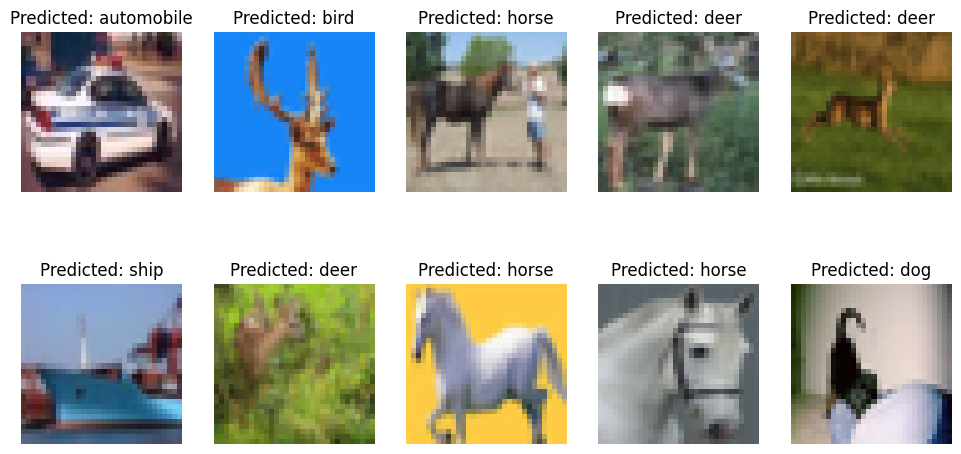

In [12]:
prediction = model.predict(x_test)
import matplotlib.pyplot as plt
import numpy as np

idx = np.random.choice(range(len(x_test)))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx + i])
    plt.title(f"Predicted: {class_names[np.argmax(prediction[idx + i])]}")
    plt.axis('off')
plt.show()